# Projekt Voki: vocabulary cards extraction

## Imports

In [17]:
import json
import fitz
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from copy import deepcopy
import cv2
import numpy as np


## Functions

In [52]:
def myimshow(im,h=12,w=8):
    plt.figure(figsize=(w,h))
    plt.imshow(im)
    
def gridshow(imgs,h=12,w=8):
    n=len(imgs)    
    fig, axes = plt.subplots(nrows=1, ncols=n, sharey='row', figsize=(h*n, h*2))
    for j, ax in enumerate(axes):
        ax.imshow(plot_images[j])
        ax.set_xticks([])
        ax.set_yticks([])
    
def getpage(data,n):
    if n<0:
        raise Exception(f'n ({n}) must be 0 or larger')
    if n< len(data['analyze_result']['read_results']): 
        return data['analyze_result']['read_results'][n]
    else: raise Exception(f"n ({n}) must be smaller than the number of pages ({len(data['analyze_result']['read_results'])})")
    
def box_to_polygon(box,w_inch,h_inch,w_pix,h_pix):
    box = np.array(box)
    return np.array([[int(x),int(y)] for x,y, in zip(box[::2]/w_inch*w_pix,box[1::2]/h_inch*h_pix)])

## Content
### get pdf and json files

In [11]:
root = Path.cwd()
root

fname_json = root.parent /'data/serievertes2.json'
fname_pdf = root.parent /'data/Scan_01-12-2021_1728.pdf' 

with open(fname_json,'r') as fh:
    data_raw=json.load(fh)

image_list=[]
zoom = 2 # to increase the resolution
mat = fitz.Matrix(zoom, zoom)
doc = fitz.open(fname_pdf)
for page in doc:
    pix = page.get_pixmap(matrix = mat)
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    image_list.append(img)
 

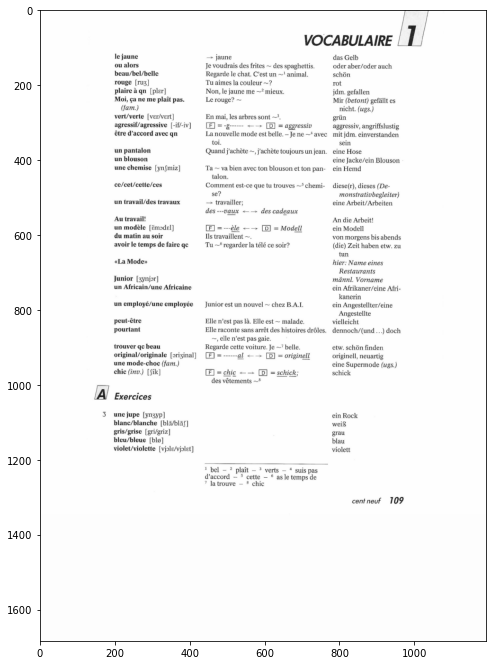

In [18]:
# show an example
myimshow(image_list[0])

### create images with poxes for visualization purpose

In [14]:

results=[]
for i, image in enumerate(image_list):
    data = getpage(data_raw,i)
    w_inch=data['width']
    h_inch=data['height']
    im=deepcopy(image)
    im = np.array(im) 
    im = im[:, :, ::-1].copy()
    h_pix ,w_pix,_ = im.shape
    line_polygons=[]
    word_polygons=[]
    
    for line in data['lines']:
        # add line info
        line_polygon = box_to_polygon(line['bounding_box'],w_inch,h_inch,w_pix,h_pix)
        im=cv2.polylines(im, [line_polygon], True, (0,255,0), thickness=3)
        line_polygons.append(line_polygon)

        # add word info
        for word in line['words']:
            word_polygon = box_to_polygon(word['bounding_box'],w_inch,h_inch,w_pix,h_pix)
            im=cv2.polylines(im, [word_polygon], True, (255,0,0), thickness=2)
            word_polygons.append(word_polygon)
            
    page_result= {
        'im':im,
        'im_raw':deepcopy(image),
        'w_inch':w_inch,
        'h_inch':h_inch,
        'h_pix':h_pix,
        'w_pix':w_pix,
        'line_polygons':line_polygons,
        'word_polygons':word_polygons
        
    }
    results.append(page_result)
    

### plot those pages

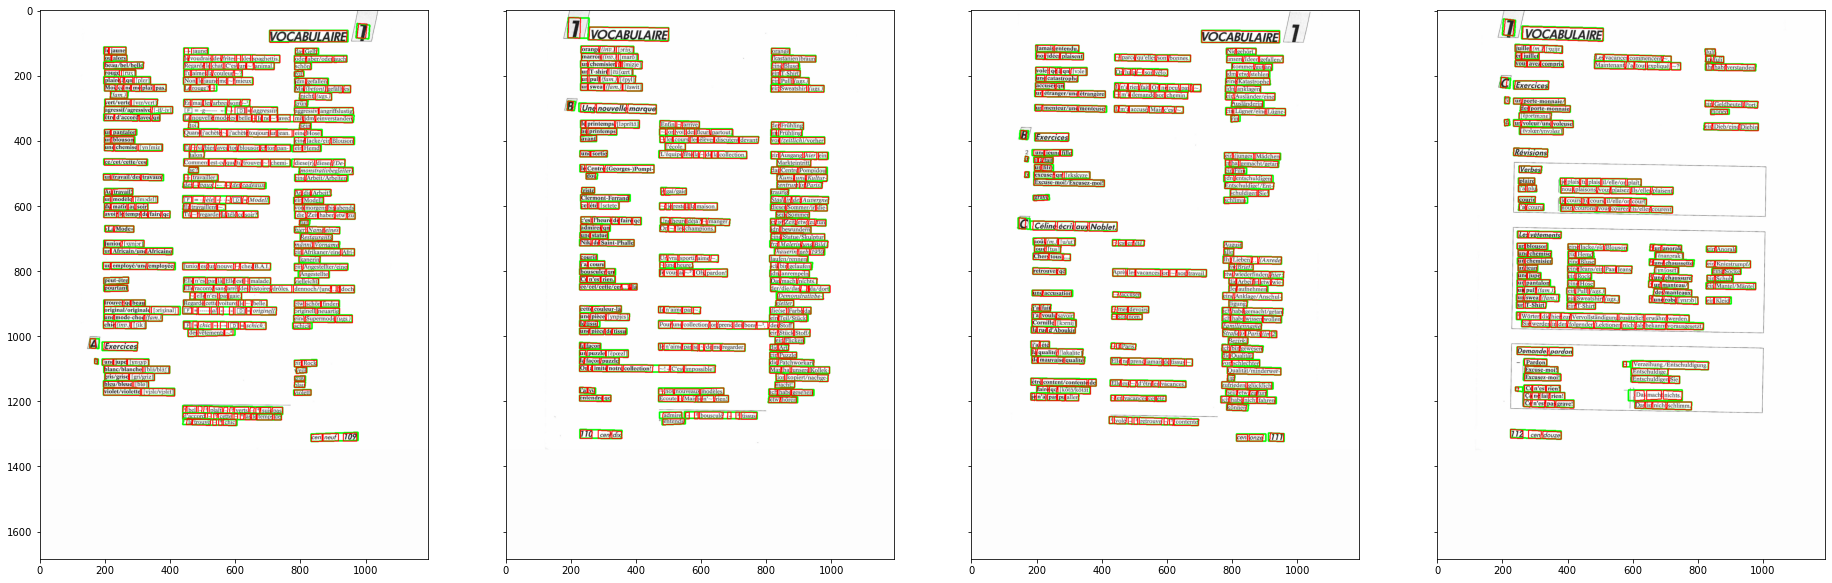

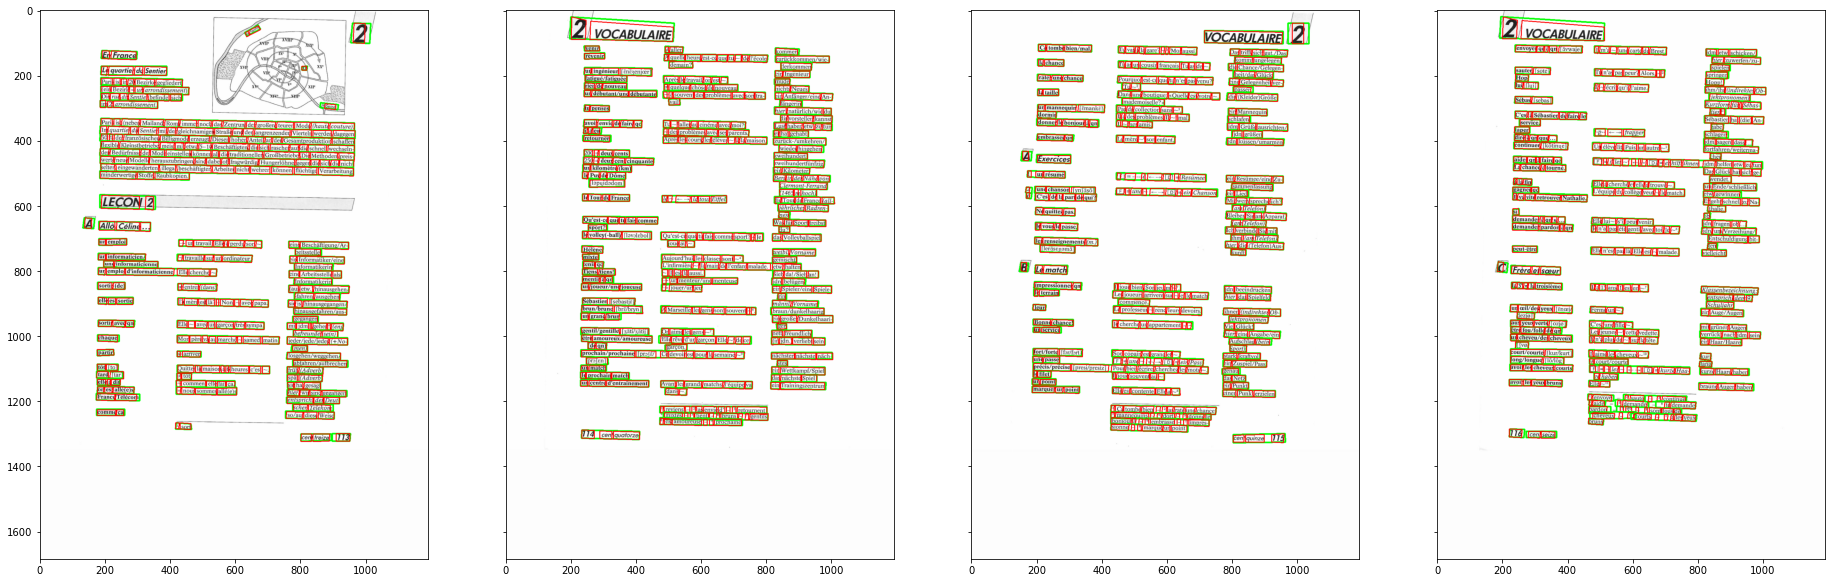

In [53]:
plot_images=[]
n = 4# number of images in one row
h = 8
for i,result in enumerate(results[:10]):
    plot_images.append(result['im'])
    if i%n == n-1:
        fig, axes = plt.subplots(nrows=1, ncols=n, sharey='row', figsize=(h*n, h*2))
        for j, ax in enumerate(axes):
            ax.imshow(plot_images[j])
        plot_images=[]
        
    

(array([ 1.,  1.,  0.,  0.,  3., 31.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  1.,  4.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 26.,  2.,
         6.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([153.  , 161.18, 169.36, 177.54, 185.72, 193.9 , 202.08, 210.26,
        218.44, 226.62, 234.8 , 242.98, 251.16, 259.34, 267.52, 275.7 ,
        283.88, 292.06, 300.24, 308.42, 316.6 , 324.78, 332.96, 341.14,
        349.32, 357.5 , 365.68, 373.86, 382.04, 390.22, 398.4 , 406.58,
        414.76, 422.94, 431.12, 439.3 , 447.48, 455.66, 463.84, 472.02,
        480.2 , 488.38, 496.56, 504.74, 512.92, 521.1 , 529.28, 537.46,
  

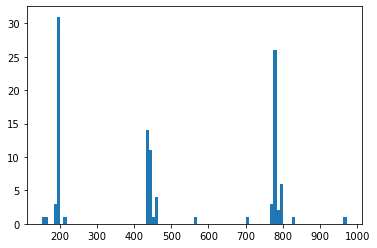

In [194]:
# show distribution of left edges
plt.hist([x[0][0] for x in polygons],bins=100)

In [141]:
[[i,x['angle']] for i,x in enumerate(data_raw['analyze_result']['read_results'])]

[[0, 0.0],
 [1, 0.4035],
 [2, 0.6987],
 [3, 0.6585],
 [4, 0.8127],
 [5, 0.6161],
 [6, 1.1112],
 [7, 1.1573],
 [8, 0.8425],
 [9, 0.786],
 [10, 0.7198],
 [11, 0.5886],
 [12, 0.5876],
 [13, 0.812],
 [14, 0.5048],
 [15, 0.6945],
 [16, 0.434],
 [17, 0.0],
 [18, 0.4213],
 [19, 0.7639],
 [20, 0.2728],
 [21, 0.6094],
 [22, 0.4795],
 [23, 0.2292],
 [24, 0.7252],
 [25, 0.3924],
 [26, 0.7393],
 [27, 0.0],
 [28, 0.5787],
 [29, 0.5305],
 [30, 0.7162],
 [31, 0.1768],
 [32, 0.5907],
 [33, 0.0],
 [34, 0.8029],
 [35, 0.0],
 [36, 0.443],
 [37, 0.4815],
 [38, 0.4547],
 [39, 0.1391],
 [40, 0.3493],
 [41, 0.4774],
 [42, 0.4569],
 [43, 0.2513]]